# Titanic Dataset Analysis and Prediction by JASSKARAN SINGH

In [499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [500]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Check and replace nan values

In [501]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Columns Age and Embarked need to be dealt with whilst Cabin can be dropped

In [502]:
median_age = df.Age.median()
print(median_age)

28.0


In [503]:
df.Age = df.Age.fillna(median_age)

In [504]:
df.Age.isna().sum()

0

In [505]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [506]:
df.Embarked = df.Embarked.fillna('S')
df.Embarked.isna().sum()

0

In [507]:
df = df.drop('Cabin',axis='columns')

In [508]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Sex relation wrt Survival

In [509]:
df[df.Sex=='male'].Survived.value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [510]:
df[df.Sex=='female'].Survived.value_counts()

1    233
0     81
Name: Survived, dtype: int64

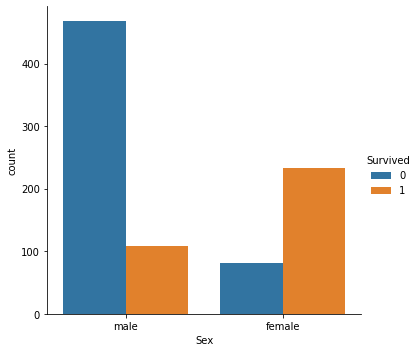

In [511]:
sn.catplot('Sex',kind='count',data=df,hue='Survived')
# more number of females survived than males

### Pclass relation wrt Survival

In [512]:
df[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [513]:
df[df.Sex=='male'].Pclass.value_counts()
# Majority of men sailed in Pclass = 3
# FUN FACT : In 'Titanic' movie we see Leonardo DiCaprio riding in 3 Pclass and it consisted mostly of male passengers.

3    347
1    122
2    108
Name: Pclass, dtype: int64

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

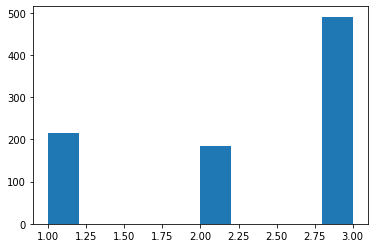

In [514]:
plt.hist(df.Pclass)
# Majority people belonged to Pclass =3

In [515]:
df[df.Pclass==3].Survived.value_counts()
# Here it shows of 491 belonging to Pclass =3 only 119 survived.

0    372
1    119
Name: Survived, dtype: int64

### SibSp relation wrt Survival

In [516]:
df[['SibSp', 'Survived']].groupby('SibSp').mean()
# This shows people with 1 or 2 sibling/spouse had best survival ratio

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


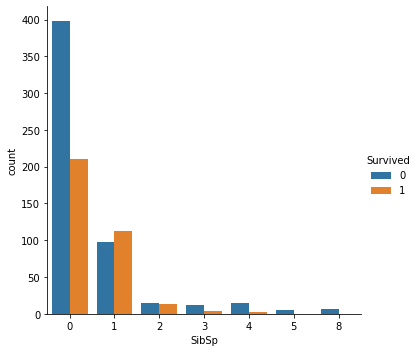

In [517]:
sn.catplot('SibSp',kind='count',data=df,hue='Survived')

### Age relation wrt Survival

In [518]:
df[df.Survived==0].Age.value_counts()
# this shows many young adults didn't survive

28.0    143
21.0     19
25.0     17
18.0     17
22.0     16
       ... 
74.0      1
32.5      1
36.5      1
55.5      1
70.5      1
Name: Age, Length: 77, dtype: int64

In [519]:
youngest_who_survived = df['Age'][(df['Survived'] == 1)].min()
youngest_who_died = df['Age'][(df['Survived'] == 0)].min()
oldest_who_survived = df['Age'][(df['Survived'] == 1)].max()
oldest_who_died = df['Age'][(df['Survived'] == 0)].max()
print('Yougest to survive:',youngest_who_survived)
print('Youngest to die:',youngest_who_died)
print('Oldest to survive:',oldest_who_survived)
print('Oldest to die:',oldest_who_died)

Yougest to survive: 0.42
Youngest to die: 1.0
Oldest to survive: 80.0
Oldest to die: 74.0


### Parch relation wrt Survival

In [520]:
df[['Parch', 'Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


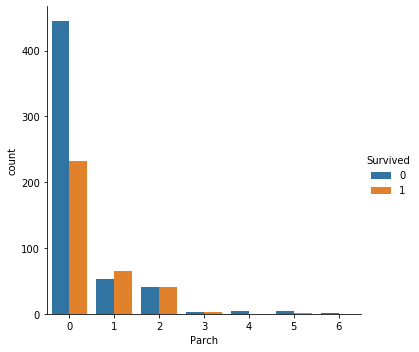

In [521]:
sn.catplot('Parch',kind='count',data=df,hue='Survived')
# People with 0/1/2 parent/children were the one's who survived the most in number

### Embarked relation wrt Survival

In [522]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [523]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [524]:
df[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


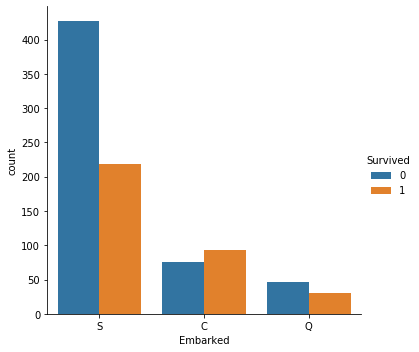

In [525]:
sn.catplot('Embarked',kind='count',data=df,hue='Survived')
# People Embarked at C had the best survival ratio more than 1

### Fare relation wrt Survival

In [526]:
avg_fare = df.Fare.mean()
print(avg_fare)

32.2042079685746


In [527]:
df.Fare.sort_values(ascending=True)

271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
         ...   
438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: Fare, Length: 891, dtype: float64

In [528]:
df[df.Fare>avg_fare].Survived.value_counts()
# Passengers who paid more than Average Fare had more people survived. Also they were lesser in number

1    126
0     85
Name: Survived, dtype: int64

In [529]:
df[df.Fare<=avg_fare].Survived.value_counts()
#  Passengers who paid less than Average Fare had less people survived. Also they were greater in number.

0    464
1    216
Name: Survived, dtype: int64

Text(0.5, 0.98, 'Scatterplot of passengers w.r.t Fare and Age for diffrent ports')

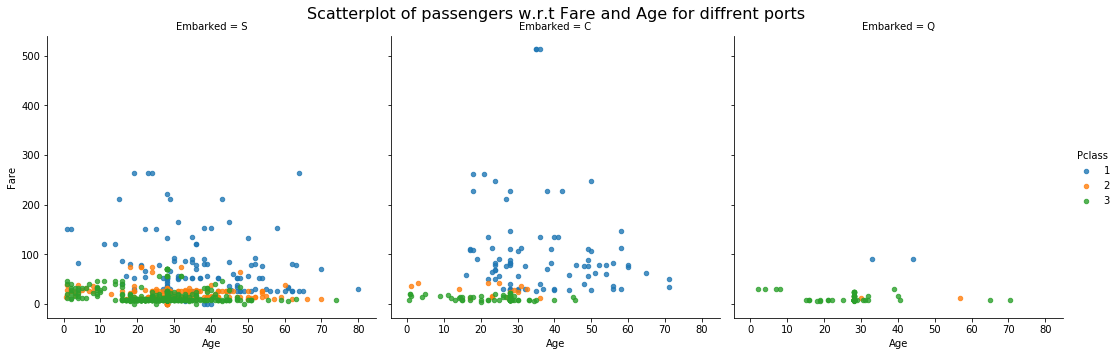

In [530]:
sn.lmplot('Age','Fare', data=df, fit_reg=False, hue="Pclass", col="Embarked", scatter_kws={"marker": ".", "s": 20})
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplot of passengers w.r.t Fare and Age for diffrent ports', fontsize=16)

# Now let's create new DF with important relational columns

In [531]:
data = df[['Sex', 'Pclass', 'Fare','Embarked', 'Survived']]
data.head()

,Sex,Pclass,Fare,Embarked,Survived
0,male,3,7.2500,S,0
1,female,1,71.2833,C,1
2,female,3,7.9250,S,1
3,female,1,53.1000,S,1
4,male,3,8.0500,S,0


In [532]:
data1 = pd.get_dummies(data[['Sex', 'Embarked']])
data1.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [533]:
data2 = pd.concat((data, data1), axis='columns')
data2.head()
data2.drop(['Sex', 'Embarked'], axis='columns', inplace=True)
data2.head()

,Pclass,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,7.2500,0,0,1,0,0,1
1,1,71.2833,1,1,0,1,0,0
2,3,7.9250,1,1,0,0,0,1
3,1,53.1000,1,1,0,0,0,1
4,3,8.0500,0,0,1,0,0,1


### To scale values between Pclass and Fare we use MinMaxScaler

In [534]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data2['Pclass'] = scaler.fit_transform(data2[['Pclass']])
data2['Fare'] = scaler.fit_transform(data2[['Fare']])
data2.head()

,Pclass,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.014151,0,0,1,0,0,1
1,0.0,0.139136,1,1,0,1,0,0
2,1.0,0.015469,1,1,0,0,0,1
3,0.0,0.103644,1,1,0,0,0,1
4,1.0,0.015713,0,0,1,0,0,1


In [535]:
inputs = data2.drop('Survived', axis = 'columns')
target = data2.Survived

### Now input and output dataframes are ready and we proceed to prepare ML model

In [536]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [537]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [538]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [539]:
model.score(X_test, y_test)

0.8435754189944135

In [540]:
y_pred = model.predict(X_test)

In [541]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[99 12]
 [16 52]]


Text(69.0, 0.5, 'Truth')

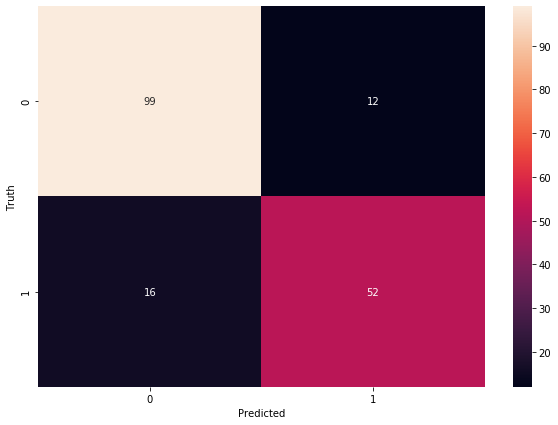

In [542]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')